<img src="./img/andalucía.png" alt="Andalucía" width="870" height="370">

# El turismo en Andalucía entre los años 2018 y 2022

<a id="indice"></a> <br>
## Indice:

#### 1.- Primeros pasos
1.1.- [Introducción](#1)  
1.2.- [Hipótesis](#2)  
1.3.- [Obtención de datos](#3)  
1.4.- [Importación de bibliotecas](#4)

#### 2.- Análisis
2.1.- [Turistas extranjeros que visitan España VS Turistas extranjeros que visitan Andalucía](#5)  
2.2.- [Turistas nacionales que viajan VS Turistas nacionales que visitan Andalucía](#6)  
2.3.- [Tipo de viajes de los turistas extranjeros en Andalucía VS Tipo de viajes de los turistas nacionales en Andalucía](#7)  
2.4.- [Gasto de los turistas extranjeros en Andalucía VS Gasto de los turistas nacionales en Andalucía](#8)  
2.5.- [BONUS: El turismo extranjero en España según el país de procedencia](#9)

## Primeros pasos

<a id="1"></a> <br>
### Introducción

En este EDA vamos a estudiar lo siguiente:
- Analizar la cantidad de turistas extranjeros que vienen a España en total, comparándolos con los que vienen expecíficamente a la Comunidad Autónoma de Andalucía.
- Analizar la cantidad de turistas nacionales que hay en total, comparándolos con los que eligen como destino Andalucía.
- Analizar el carácter de los viajes de los turistas extranjeros, frente al carácter de los viajes de los turistas nacionales, siempre dentro de Andalucía.
- Analizar el gasto realizado por los turistas extranjeros en Andalucía, comparándolos con el gasto realizado por los turistas nacionales en el mismo destino.

Los datos los hemos obtenidos de la siguente manera:
- Tablas en formato .csv con los datos necesarios para cada análisis, extraidas del Instituto Nacional de Estadística (INE) a través del [siguiente enlace](https://www.ine.es/dyngs/INEbase/es/categoria.htm?c=Estadistica_P&cid=1254735570703)

<a id="2"></a> <br>
### Hipótesis

Con los datos que tenemos intentaremos resolver las siguientes hipótesis:
- Ver la cantidad de turistas extranjeros y nacionales que eligen como destino Andalucía frente a otras posibilidades.
- Comprobar que tipo de viaje impera dentro de la Comunidad Autónoma de Andalucía.
- Qué turismo (extranjero o nacional) es más beneficiosos, respecto a las ganancias, en Andalucía.
- Visibilizar cómo afectó elementos como la pandemia COVID-19 y el Brexit en el turismo de Andalucía.

<a id="3"></a> <br>
### Obtención de datos

Los datos los hemos obtenido de la página del [Instituo Nacional de Estadística (INE)](https://www.ine.es)

Para ello hemos entradado en la página del INE > Servicios > Hostlería y Turismo.  
Una vez ahí, hemos ido sacando las tablas necesarias entre las distintas opciones que nos ofrecen.

<img src="./img/ine.png" alt="Andalucía" width="700" height="350">

En la obtención de datos a través del Instituto Nacional de Etsadística nos encontramos con ventajas y desventajas.

Entre las ventajas tenemos:
- Son datos fiables y nuestros estudios van a tener una buena base.
- El acceso a los datos es fácil y nos permite obtenerlos de una forma bastante depurada de inicio.
- Tienes la opción de sacar las tablas en diferentes formatos.

Entre las desventajas tenemos:
- La fiabilidad de los datos no va de la mano con que haya registros de todos los datos que queremos.
- El filtrado a pesar de ser una ventaja por un lado, también hace que haya consultas que no podamos hacer.
- Hay que tener cuidado con las medidas que se usan en cada apartado, para que no haya errores a la hora de cruzar unos datos con otros.

<a id="4"></a> <br>
### Importación de bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.dates import YearLocator, DateFormatter

## Análisis

<a id="5"></a> <br>
### Turistas extranjeros que visitan España VS Turistas extranjeros que visitan Andalucía

In [2]:
# Creamos nuestro dataframe
df_turistas_extranjeros_españa = pd.read_csv("./data/Número de turistas extranjeros en España.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos y las renombramos
df_turistas_extranjeros_españa = df_turistas_extranjeros_españa.drop(["Comunidades autónomas", "Tipo de dato"], axis = 1)
df_turistas_extranjeros_españa = df_turistas_extranjeros_españa.rename(columns = {"Total" : "Total España"})

# Convertimos la columna 'Periodo' en formato fecha y modificamos la columna 'Total España'
df_turistas_extranjeros_españa["Periodo"] = pd.to_datetime(df_turistas_extranjeros_españa["Periodo"], format = "%YM%m")
df_turistas_extranjeros_españa["Total España"] = df_turistas_extranjeros_españa["Total España"].str.replace(".", "").astype(int)

In [3]:
df_turistas_extranjeros_españa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Periodo       60 non-null     datetime64[ns]
 1   Total España  60 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 848.0 bytes


In [4]:
df_turistas_extranjeros_españa.head()

,Periodo,Total España
0,2022-12-01,4127293
1,2022-11-01,4334651
2,2022-10-01,7176984
3,2022-09-01,7767211
4,2022-08-01,8848665


In [5]:
# Creamos nuestro dataframe
df_turistas_extranjeros_andalucia = pd.read_csv("./data/Número de turistas extranjeros en Andalucía.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos y las renombramos
df_turistas_extranjeros_andalucia = df_turistas_extranjeros_andalucia.drop(["Comunidades autónomas", "Tipo de dato"], axis = 1)
df_turistas_extranjeros_andalucia = df_turistas_extranjeros_andalucia.rename(columns = {"Total" : "Total Andalucía"})

# Convertimos la columna 'Periodo' en formato fecha y modificamos la columna 'Total Andalucía'
df_turistas_extranjeros_andalucia["Periodo"] = pd.to_datetime(df_turistas_extranjeros_andalucia["Periodo"], format = "%YM%m")
df_turistas_extranjeros_andalucia["Total Andalucía"] = df_turistas_extranjeros_andalucia["Total Andalucía"].str.replace(".", "").astype(int)

In [6]:
df_turistas_extranjeros_andalucia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Periodo          60 non-null     datetime64[ns]
 1   Total Andalucía  60 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 848.0 bytes


In [7]:
df_turistas_extranjeros_andalucia.head()

,Periodo,Total Andalucía
0,2022-12-01,533927
1,2022-11-01,592129
2,2022-10-01,1048112
3,2022-09-01,1101005
4,2022-08-01,1295900


In [8]:
# Unimos ambas tablas en una
df_numero_turistas_extranjeros = pd.merge(df_turistas_extranjeros_españa, df_turistas_extranjeros_andalucia, on = "Periodo", how = "inner")

df_numero_turistas_extranjeros.head()

,Periodo,Total España,Total Andalucía
0,2022-12-01,4127293,533927
1,2022-11-01,4334651,592129
2,2022-10-01,7176984,1048112
3,2022-09-01,7767211,1101005
4,2022-08-01,8848665,1295900


In [9]:
# Sacamos el porcentaje de turistas extranjeros que vienen a Andalucía con respecto al total de España
df_numero_turistas_extranjeros_porcentaje = pd.merge(df_turistas_extranjeros_españa, df_turistas_extranjeros_andalucia, on = "Periodo", how = "inner")
df_numero_turistas_extranjeros_porcentaje["Porcentaje Andalucía"] = (df_numero_turistas_extranjeros_porcentaje["Total Andalucía"] / df_numero_turistas_extranjeros_porcentaje["Total España"]) * 100

df_numero_turistas_extranjeros_porcentaje.head()

,Periodo,Total España,Total Andalucía,Porcentaje Andalucía
0,2022-12-01,4127293,533927,12.936494
1,2022-11-01,4334651,592129,13.660362
2,2022-10-01,7176984,1048112,14.603795
3,2022-09-01,7767211,1101005,14.175037
4,2022-08-01,8848665,1295900,14.645147


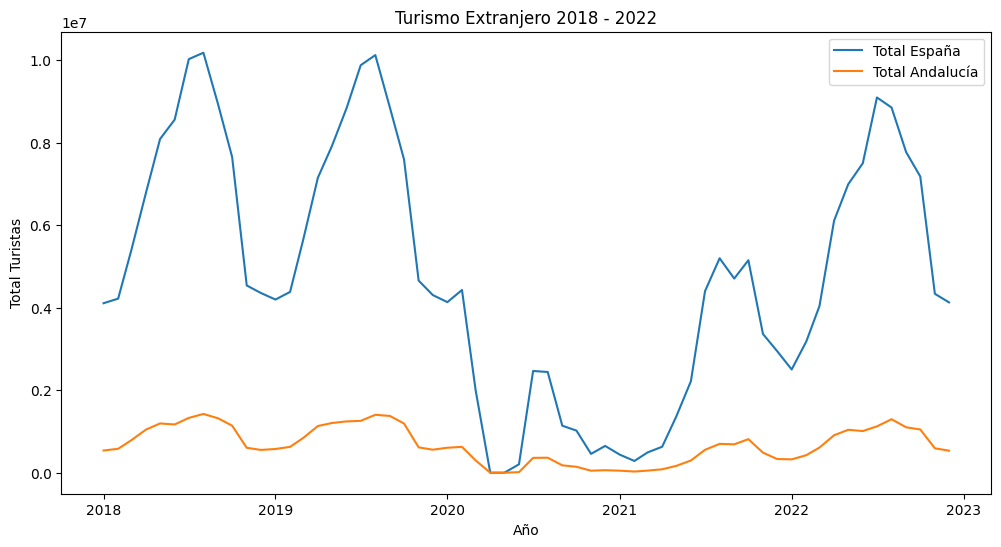

In [10]:
# Creamos un gráfico de lineas que compara la evolución temporal de las cifras de 'Total España' y 'Total Andalucía'
plt.figure(figsize = (12, 6))

plt.plot(df_numero_turistas_extranjeros["Periodo"], df_numero_turistas_extranjeros["Total España"], label = "Total España")
plt.plot(df_numero_turistas_extranjeros["Periodo"], df_numero_turistas_extranjeros["Total Andalucía"], label = "Total Andalucía");

plt.title("Turismo Extranjero 2018 - 2022")
plt.xlabel("Año")
plt.ylabel("Total Turistas")
plt.legend();

plt.savefig("./graficos/Turismo Extranjero 2018 - 2022.png")

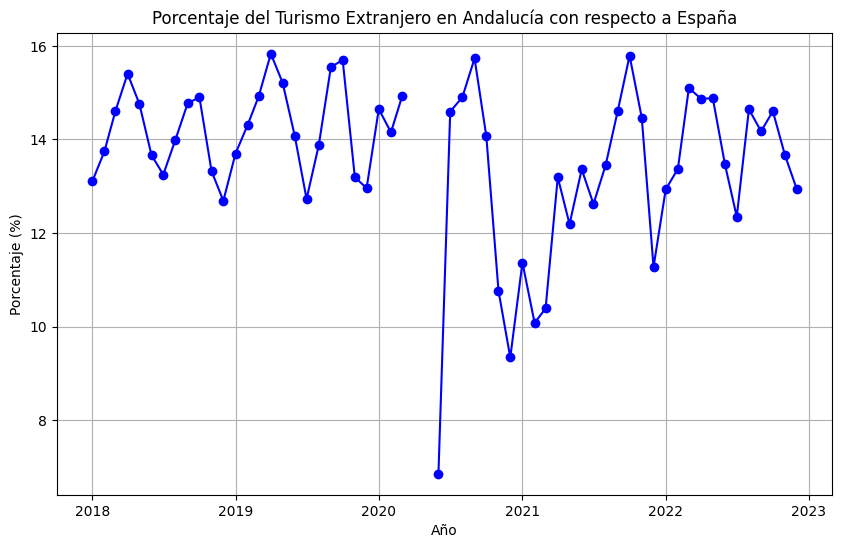

In [11]:
# Creamos un gráfico de lineas para observar la evolución del porcentaje del turismo extranjero en Andalucía con respecto a España
plt.figure(figsize = (10, 6))

plt.plot(df_numero_turistas_extranjeros_porcentaje["Periodo"], df_numero_turistas_extranjeros_porcentaje["Porcentaje Andalucía"], marker = "o", color = "b", linestyle = "-")

plt.title("Porcentaje del Turismo Extranjero en Andalucía con respecto a España")
plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.grid(True);

plt.savefig("./graficos/Porcentaje del Turismo Extranjero en Andalucía con respecto a España.png")

### Conclusión

Respecto al turismo extranjero en España comparado con el que recae en Andalucía, podemos ver en los datos y las gráficas, que tanto en 2018 como 2019 son casi un calco. El diujo en la gráfica de líneas hace un patrón idéntico en ambos años, tanto en el "Total España" como en el "Total Andalucía".  
Sin embargo, vemos que en los primeros meses del año 2020 la gráfica deja de hacer el mismo dibujo en ambas líneas. Esto se debe a que en esas fechas se declaró la pandemia COVID-19 y muchos países sufrimos un confinamiento.  
Después de esto, vemos como hay repuntes, principalmente en los meses de verano, y que poco a poco vamos volviendo a la sintonía que teniamos antes de la pandemia. Sin embargo, podemos observar que en 2022 aún no hemos recuperado el nivel del turismo que teniamos pre-pandemia.

Respecto a los porcentajes vemos que fluctuan bastante más y que no hay un patrón marcado como en la otra gráfica. Por supuesto, vemos también reflejado lo que ha supuesto la pandemia para el turismo, donde vemos que incluso no hay datos, y que aún estamos en recuperación.  
En este punto, si que habría que remarcar como llamativo el hecho de que a Andalucía cuando vienen menos extranjeros es en los meses de verano. Si nos fijamos en la gráfica, vemos que en los meses previos al verano hay un repunte, que después baja y que pasado el verano vuelve a subir. Por lo tanto, podemos decir que los meses fuerte para el turismo extranjero en Andalucía son: Marzo, Abril, Mayo, Septiembre y Octubre.

<a id="6"></a> <br>
### Turistas nacionales que viajan VS Turistas nacionales que visitan Andalucía

In [12]:
# Creamos nuestro dataframe
df_viajes_nacionales_total = pd.read_csv("./data/Número de turistas nacionales en total.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos
df_viajes_nacionales_total = df_viajes_nacionales_total.drop(["Concepto turístico", "Tipo de dato", "Destino"], axis = 1)

# Convertimos la columna 'Periodo' en formato fecha y modificamos la columna 'Total'
df_viajes_nacionales_total["Periodo"] = pd.to_datetime(df_viajes_nacionales_total["Periodo"], format = "%Y")
df_viajes_nacionales_total["Total"] = df_viajes_nacionales_total["Total"].str.replace(".", "").astype(int)

In [13]:
df_viajes_nacionales_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Periodo  5 non-null      datetime64[ns]
 1   Total    5 non-null      int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 188.0 bytes


In [14]:
df_viajes_nacionales_total

,Periodo,Total
0,2022-01-01,171388138
1,2021-01-01,142893461
2,2020-01-01,101523862
3,2019-01-01,193874716
4,2018-01-01,196079470


In [15]:
# Creamos nuestro dataframe
df_viajes_nacionales_andalucia = pd.read_csv("./data/Número de turistas nacionales en Andalucía.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos y las renombramos
df_viajes_nacionales_andalucia = df_viajes_nacionales_andalucia.drop(["Concepto turístico", "Tipo de dato", "Destino"], axis = 1)
df_viajes_nacionales_andalucia = df_viajes_nacionales_andalucia.rename(columns = {"Total" : "Total Andalucía"})

# Convertimos la columna 'Periodo' en formato fecha y modificamos la columna 'Total Andalucía'
df_viajes_nacionales_andalucia["Periodo"] = pd.to_datetime(df_viajes_nacionales_andalucia["Periodo"], format = "%Y")
df_viajes_nacionales_andalucia["Total Andalucía"] = df_viajes_nacionales_andalucia["Total Andalucía"].str.replace(".", "").astype(int)

In [16]:
df_viajes_nacionales_andalucia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Periodo          5 non-null      datetime64[ns]
 1   Total Andalucía  5 non-null      int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 188.0 bytes


In [17]:
df_viajes_nacionales_andalucia

,Periodo,Total Andalucía
0,2022-01-01,28120282
1,2021-01-01,25978674
2,2020-01-01,18889241
3,2019-01-01,32717537
4,2018-01-01,32647910


In [18]:
# Unimos ambas tablas en una
df_numero_viajes_nacionales = pd.merge(df_viajes_nacionales_total, df_viajes_nacionales_andalucia, on = "Periodo", how = "inner")

df_numero_viajes_nacionales

,Periodo,Total,Total Andalucía
0,2022-01-01,171388138,28120282
1,2021-01-01,142893461,25978674
2,2020-01-01,101523862,18889241
3,2019-01-01,193874716,32717537
4,2018-01-01,196079470,32647910


In [19]:
# Sacamos el porcentaje de turistas nacionales que vienen a Andalucía con respecto a otros destinos
df_numero_turistas_nacionales_porcentaje = pd.merge(df_viajes_nacionales_total, df_viajes_nacionales_andalucia, on = "Periodo", how = "inner")
df_numero_turistas_nacionales_porcentaje["Porcentaje Andalucía"] = (df_numero_turistas_nacionales_porcentaje["Total Andalucía"] / df_numero_turistas_nacionales_porcentaje["Total"]) * 100

df_numero_turistas_nacionales_porcentaje

,Periodo,Total,Total Andalucía,Porcentaje Andalucía
0,2022-01-01,171388138,28120282,16.407368
1,2021-01-01,142893461,25978674,18.180450
2,2020-01-01,101523862,18889241,18.605716
3,2019-01-01,193874716,32717537,16.875608
4,2018-01-01,196079470,32647910,16.650346


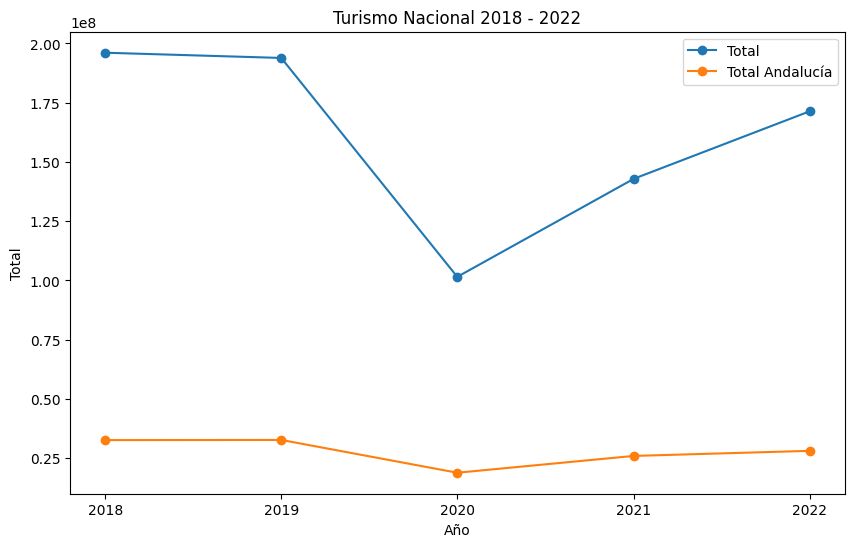

In [20]:
# Creamos un gráfico de líneas con las columnas de nuestro dataframe
plt.figure(figsize = (10, 6))

plt.plot(df_numero_viajes_nacionales["Periodo"], df_numero_viajes_nacionales["Total"], marker = "o", label = "Total")
plt.plot(df_numero_viajes_nacionales["Periodo"], df_numero_viajes_nacionales["Total Andalucía"], marker = "o", label = "Total Andalucía")

plt.title("Turismo Nacional 2018 - 2022")
plt.xlabel("Año")
plt.ylabel("Total")
plt.legend()

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graficos/Turismo Nacional 2018 - 2022.png")

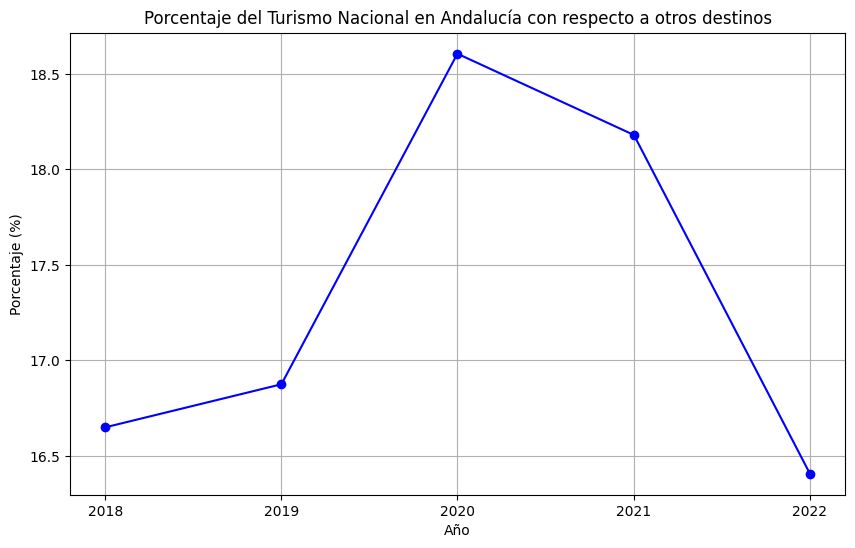

In [21]:
# Creamos un gráfico de lineas para observar la evolución del porcentaje del turismo nacional en Andalucía con respecto a otros destinos
plt.figure(figsize = (10, 6))

plt.plot(df_numero_turistas_nacionales_porcentaje["Periodo"], df_numero_turistas_nacionales_porcentaje["Porcentaje Andalucía"], marker = "o", color = "b", linestyle = "-")

plt.title("Porcentaje del Turismo Nacional en Andalucía con respecto a otros destinos")
plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.grid(True)

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graficos/Porcentaje del Turismo Nacional en Andalucía con respecto a otros destinos.png")

### Conclusión

En este análisis los datos son anuales y no mensuales como en el del turismo extranjero.

Respecto al número de personas nacionales que viajan comparado con las que deciden hacerlo en Andalucía, podemos ver en los datos y las gráficas, que ambas líneas hacen un dibujo similar, con la diferencia que el "Total Andalucía" no tiene caidas tan acusadas.  
La caida que vemos en el año 2020 es nuevamente debido al tema de la pandemia COVID-19, donde comprobamos que baja el número de personas que viajan y, aunque también lo hacen en Andalucía, no es una pérdida tan significativa. Es más, en el "Total Andalucía" vemos que a pesar de la pandemia la línea no pierde demasiado su carácter recto.  
Esto muy probablemente sea debido a las restricciones que sufrimos por el COVID-19, donde era mucho más fácil moverte dentro de tu propia Comunidad Autónoma o país que viajar a cualquier otro destino.

Esto último comentado, se puede ver aún mas reforzado en el gráfico de los porcentajes, donde vemos que en los años 2020 y 2021 el porcentaje de turismo nacional que tenemos en Andalucía llega a cifras que no son las habituales. A su vez, vemos que en el año 2022 ese porcentaje cae por debajo de cifras pre-pandemia, quizas motivado por el fin de las restrincciones y la perdida del miedo ante los contagios del nuevo virus.

### Conclusión Extra

Ahora bien, si cogieramos los porcentajes del turismo extranjero y el del turismo nacional en Andalucía, y haciendo los cambios oportunos para igualar el análisis, podemos ver que hay mas personas nacionales que viajan y deciden hacerlo a Andalucía, que personas extranjeras que deciden venir a España y eligen como destino principal Andalucía.  
Es más, el porcentaje más alto del turismo extranjero en Andalucía está bastante lejos del porcentaje más bajo del turismo nacional.

La media del los porcentajes del turismo extranjero en Andalucía es: 14.07
La media del los porcentajes del turismo nacional en Andalucía es: 17.34


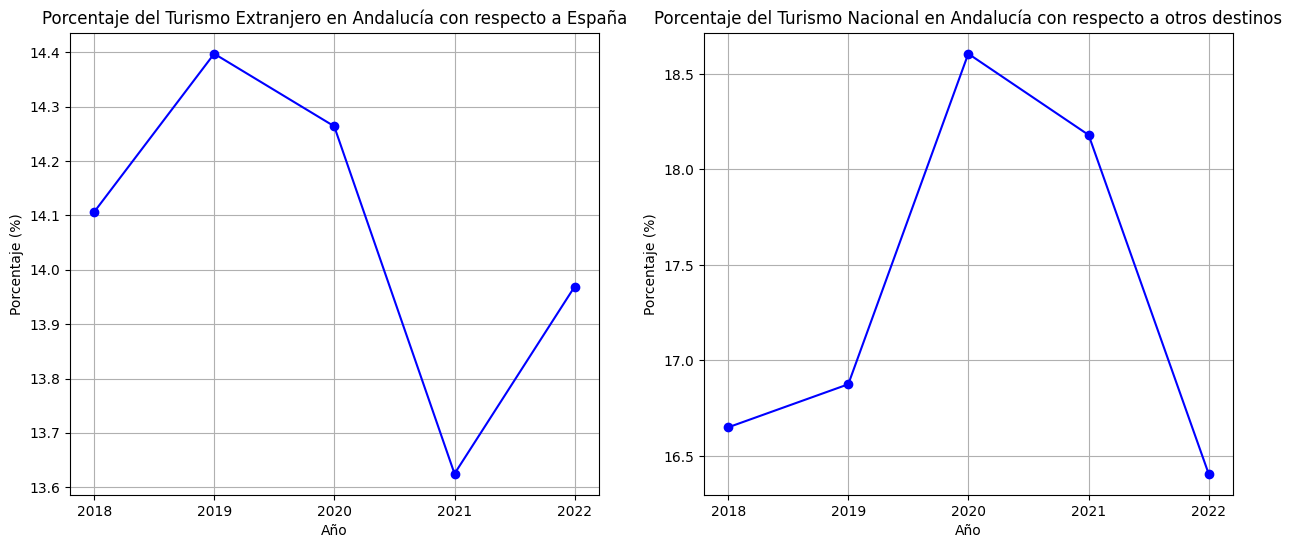

In [22]:
# Calculamos el número de turistas extranjeros por año completo y su porcentaje
df_extranjeros_españa_año = df_turistas_extranjeros_españa.copy()
df_extranjeros_españa_año["Periodo"] = df_extranjeros_españa_año["Periodo"].dt.year
df_extranjeros_españa_año = df_extranjeros_españa_año.groupby(["Periodo"])["Total España"].sum().reset_index()
df_extranjeros_españa_año["Periodo"] = pd.to_datetime(df_extranjeros_españa_año["Periodo"], format = "%Y")

df_extranjeros_andalucia_año = df_turistas_extranjeros_andalucia.copy()
df_extranjeros_andalucia_año["Periodo"] = df_extranjeros_andalucia_año["Periodo"].dt.year
df_extranjeros_andalucia_año = df_extranjeros_andalucia_año.groupby(["Periodo"])["Total Andalucía"].sum().reset_index()
df_extranjeros_andalucia_año["Periodo"] = pd.to_datetime(df_extranjeros_andalucia_año["Periodo"], format = "%Y")

df_numero_extranjeros_año = pd.merge(df_extranjeros_españa_año, df_extranjeros_andalucia_año, on = "Periodo", how = "inner")
df_numero_extranjeros_año["Porcentaje Andalucía"] = (df_numero_extranjeros_año["Total Andalucía"] / df_numero_extranjeros_año["Total España"]) * 100

# Representamos las gráficas de los porcentajes del turismo extranjero y el turismo nacional
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

axs[0].plot(df_numero_extranjeros_año["Periodo"], df_numero_extranjeros_año["Porcentaje Andalucía"], marker = "o", color = "b", linestyle = "-")
axs[0].set_title("Porcentaje del Turismo Extranjero en Andalucía con respecto a España")
axs[0].set_xlabel("Año")
axs[0].set_ylabel("Porcentaje (%)")
axs[0].grid(True)
axs[0].xaxis.set_major_locator(YearLocator())
axs[0].xaxis.set_major_formatter(DateFormatter("%Y"))

axs[1].plot(df_numero_turistas_nacionales_porcentaje["Periodo"], df_numero_turistas_nacionales_porcentaje["Porcentaje Andalucía"], marker = "o", color = "b", linestyle = "-")
axs[1].set_title("Porcentaje del Turismo Nacional en Andalucía con respecto a otros destinos")
axs[1].set_xlabel("Año")
axs[1].set_ylabel("Porcentaje (%)")
axs[1].grid(True)
axs[1].xaxis.set_major_locator(YearLocator())
axs[1].xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graficos/Porcentaje Turismo Extranjero VS Porcentaje Turismo Nacional.png")

# Calculamos la media de los porcentajes
media_porcentaje_turismo_extranjero = df_numero_extranjeros_año["Porcentaje Andalucía"].mean().round(2)
media_porcentaje_turismo_nacional = df_numero_turistas_nacionales_porcentaje["Porcentaje Andalucía"].mean().round(2)

print("La media del los porcentajes del turismo extranjero en Andalucía es:", media_porcentaje_turismo_extranjero)
print("La media del los porcentajes del turismo nacional en Andalucía es:", media_porcentaje_turismo_nacional)

<a id="7"></a> <br>
### Tipo de viajes de los turistas extranjeros en Andalucía VS Tipo de viajes de los turistas nacionales en Andalucía

In [23]:
# Creamos nuestro dataframe
df_turismo_extranjero_motivo = pd.read_csv("./data/Número de turistas extranjeros según motivo principal del viaje.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos y las renombramos
df_turismo_extranjero_motivo = df_turismo_extranjero_motivo.drop(["Tipo de dato"], axis = 1)
df_turismo_extranjero_motivo = df_turismo_extranjero_motivo.rename(columns = {"Total" : "Total Turismo Extranjero"})

# Convertimos la columna 'Periodo' en formato fecha y modificamos la columna 'Total Turismo Extranjero'
df_turismo_extranjero_motivo["Periodo"] = pd.to_datetime(df_turismo_extranjero_motivo["Periodo"], format = "%YM%m")
df_turismo_extranjero_motivo["Total Turismo Extranjero"] = df_turismo_extranjero_motivo["Total Turismo Extranjero"].str.replace(".", "").astype(int)

# Cambiamos la etiqueta 'Negocio, motivos profesionales' por 'Negocios y otros motivos profrsionales'
df_turismo_extranjero_motivo.loc[df_turismo_extranjero_motivo["Motivo del viaje"] == "Negocio, motivos profesionales", "Motivo del viaje"] = "Negocios y otros motivos profesionales"

# Sumamos las cifras del turismo por año completo
df_turismo_extranjero_motivo["Año"] = df_turismo_extranjero_motivo["Periodo"].dt.year
df_turismo_extranjero_motivo = df_turismo_extranjero_motivo.groupby(["Año", "Motivo del viaje"])["Total Turismo Extranjero"].sum().reset_index()
df_turismo_extranjero_motivo["Año"] = pd.to_datetime(df_turismo_extranjero_motivo["Año"], format = "%Y")

In [24]:
df_turismo_extranjero_motivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Año                       15 non-null     datetime64[ns]
 1   Motivo del viaje          15 non-null     object        
 2   Total Turismo Extranjero  15 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 428.0+ bytes


In [25]:
df_turismo_extranjero_motivo

,Año,Motivo del viaje,Total Turismo Extranjero
0,2018-01-01,Negocios y otros motivos profesionales,5023357
1,2018-01-01,"Ocio, recreo y vacaciones",72173054
2,2018-01-01,Otros motivos,5612007
3,2019-01-01,Negocios y otros motivos profesionales,5409184
4,2019-01-01,"Ocio, recreo y vacaciones",72976424
5,2019-01-01,Otros motivos,5123547
6,2020-01-01,Negocios y otros motivos profesionales,1346061
7,2020-01-01,"Ocio, recreo y vacaciones",15533527
8,2020-01-01,Otros motivos,2053516
9,2021-01-01,Negocios y otros motivos profesionales,2076220


In [26]:
# Creamos nuestro dataframe
df_turismo_nacional_motivo = pd.read_csv("./data/Número de turistas nacionales según motivo principal del viaje.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos y las renombramos
df_turismo_nacional_motivo = df_turismo_nacional_motivo.drop(["Destino principal", "Comunidad autónoma de residencia", "Duración del viaje", "Forma de organización del viaje", "Transporte principal", "Alojamiento principal: Nivel 1", "Alojamiento principal: Nivel 2", "Concepto turístico"], axis = 1)
df_turismo_nacional_motivo = df_turismo_nacional_motivo.rename(columns = {"Total" : "Total Turismo Nacional", "Periodo" : "Año", "Motivo principal" : "Motivo del viaje"})

# Convertimos la columna 'Año' en formato fecha y modificamos la columna 'Total Turismo Extranjero'
df_turismo_nacional_motivo["Año"] = pd.to_datetime(df_turismo_nacional_motivo["Año"], format = "%Y")
df_turismo_nacional_motivo["Total Turismo Nacional"] = df_turismo_nacional_motivo["Total Turismo Nacional"].str.replace(".", "").astype(int)

In [27]:
df_turismo_nacional_motivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Motivo del viaje        15 non-null     object        
 1   Año                     15 non-null     datetime64[ns]
 2   Total Turismo Nacional  15 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 428.0+ bytes


In [28]:
df_turismo_nacional_motivo

,Motivo del viaje,Año,Total Turismo Nacional
0,Negocios y otros motivos profesionales,2022-01-01,2236181
1,Negocios y otros motivos profesionales,2021-01-01,2124329
2,Negocios y otros motivos profesionales,2020-01-01,1689299
3,Negocios y otros motivos profesionales,2019-01-01,1893374
4,Negocios y otros motivos profesionales,2018-01-01,2611443
5,"Ocio, recreo y vacaciones",2022-01-01,15353501
6,"Ocio, recreo y vacaciones",2021-01-01,13009298
7,"Ocio, recreo y vacaciones",2020-01-01,9103251
8,"Ocio, recreo y vacaciones",2019-01-01,17590612
9,"Ocio, recreo y vacaciones",2018-01-01,16963300


In [29]:
# Unimos todas las tablas en una
df_turismo_motivo = pd.merge(df_turismo_extranjero_motivo, df_turismo_nacional_motivo, on = ["Año", "Motivo del viaje"], how = "inner")

df_turismo_motivo

,Año,Motivo del viaje,Total Turismo Extranjero,Total Turismo Nacional
0,2018-01-01,Negocios y otros motivos profesionales,5023357,2611443
1,2018-01-01,"Ocio, recreo y vacaciones",72173054,16963300
2,2018-01-01,Otros motivos,5612007,1583963
3,2019-01-01,Negocios y otros motivos profesionales,5409184,1893374
4,2019-01-01,"Ocio, recreo y vacaciones",72976424,17590612
5,2019-01-01,Otros motivos,5123547,1797527
6,2020-01-01,Negocios y otros motivos profesionales,1346061,1689299
7,2020-01-01,"Ocio, recreo y vacaciones",15533527,9103251
8,2020-01-01,Otros motivos,2053516,888960
9,2021-01-01,Negocios y otros motivos profesionales,2076220,2124329


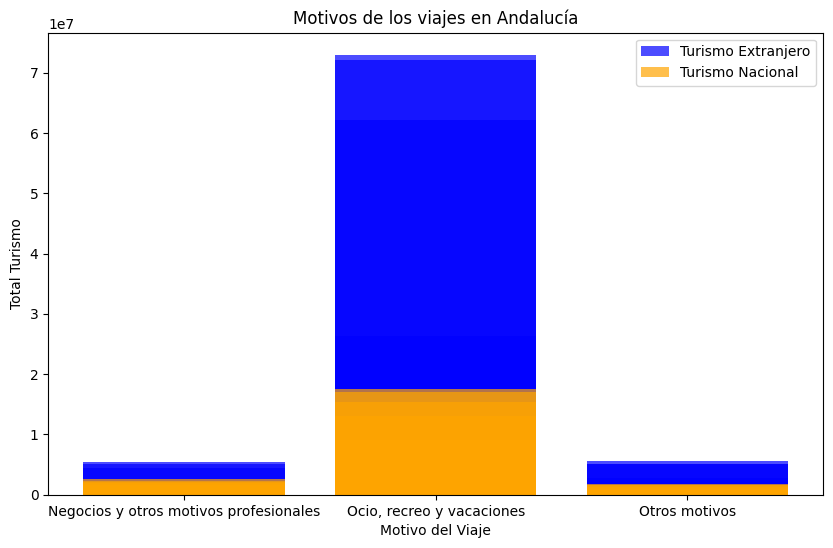

In [30]:
# Creamos un gráfico de barras que muestra el turismo extranjero y el nacional según el motivo del viaje
plt.figure(figsize = (10, 6))

plt.bar(df_turismo_motivo["Motivo del viaje"], df_turismo_motivo["Total Turismo Extranjero"], color = "blue", alpha = 0.7, label = "Turismo Extranjero")
plt.bar(df_turismo_motivo["Motivo del viaje"], df_turismo_motivo["Total Turismo Nacional"], color = "orange", alpha = 0.7, label = "Turismo Nacional")

plt.title("Motivos de los viajes en Andalucía")
plt.xlabel("Motivo del Viaje")
plt.ylabel("Total Turismo")
plt.legend();

plt.savefig("./graficos/Motivos de los viajes en Andalucía.png")

### Conclusión

En este análisis y viendo el gráfico, podemos ver que los movimientos de personas extranjeras y nacionales en Andalucía motivadas por temas profesionales son bastante parejas.  
Sin embargo, si nos vamos a temas vacacionales vemos como Andalucía es un destino bastante elegido por este motivo para el turismo extranjero, pero no tanto para el turismo nacional. Habría que ver profundizar más en este análisis para determinar que tipo de ocio o vacaciones es el que impera dentro del turismo extranjero.  
Por otra parte, dentro de "Otros motivos", vemos como el turismo extranjero también tiene cifras más altas con respecto al turismo nacional. Tal vez sería interesante saber que se engloba dentro de esa categoría para determinar más especificamente cuáles son las motivaciones de los extranjeros.

<a id="8"></a> <br>
### Gasto de los turistas extranjeros en Andalucía VS Gasto de los turistas nacionales en Andalucía

In [31]:
# Creamos nuestro dataframe
df_turismo_extranjero_gasto = pd.read_csv("./data/Gasto de los turistas extranjeros en Andalucía.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos y las renombramos
df_turismo_extranjero_gasto = df_turismo_extranjero_gasto.drop(["Comunidades  autónomas", "Gastos y duración media de los viajes", "Tipo de dato"], axis = 1)
df_turismo_extranjero_gasto = df_turismo_extranjero_gasto.rename(columns = {"Total" : "Total Gasto Extranjero"})

# Convertimos la columna 'Periodo' en formato fecha y modificamos la columna 'Total Turismo Extranjero'
df_turismo_extranjero_gasto["Periodo"] = pd.to_datetime(df_turismo_extranjero_gasto["Periodo"], format = "%YM%m")
df_turismo_extranjero_gasto["Total Gasto Extranjero"] = df_turismo_extranjero_gasto["Total Gasto Extranjero"].str.replace(".", "").str.replace(",", ".").astype(float)

# Sumamos las cifras por año completo
df_turismo_extranjero_gasto = df_turismo_extranjero_gasto.groupby(df_turismo_extranjero_gasto["Periodo"].dt.year)["Total Gasto Extranjero"].sum().reset_index()
df_turismo_extranjero_gasto["Periodo"] = pd.to_datetime(df_turismo_extranjero_gasto["Periodo"], format = "%Y")

# Convertimos las cantidades de millones a miles
df_turismo_extranjero_gasto["Total Gasto Extranjero"] *= 1000

In [32]:
df_turismo_extranjero_gasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Periodo                 5 non-null      datetime64[ns]
 1   Total Gasto Extranjero  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 208.0 bytes


In [33]:
df_turismo_extranjero_gasto

,Periodo,Total Gasto Extranjero
0,2018-01-01,12641390.0
1,2019-01-01,12412970.0
2,2020-01-01,2875140.0
3,2021-01-01,4768270.0
4,2022-01-01,11989590.0


In [34]:
# Creamos nuestro dataframe
df_turismo_nacional_gasto = pd.read_csv("./data/Gasto de los turistas nacionales en Andalucía.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos y las renombramos
df_turismo_nacional_gasto = df_turismo_nacional_gasto.drop(["Destino", "Tipo de dato", "Concepto turístico"], axis = 1)
df_turismo_nacional_gasto = df_turismo_nacional_gasto.rename(columns = {"Total" : "Total Gasto Nacional"})

# Convertimos la columna 'Periodo' en formato fecha y modificamos la columna 'Total Turismo Nacional'
df_turismo_nacional_gasto["Periodo"] = pd.to_datetime(df_turismo_nacional_gasto["Periodo"], format = "%Y")
df_turismo_nacional_gasto["Total Gasto Nacional"] = df_turismo_nacional_gasto["Total Gasto Nacional"].str.replace(".", "").str.replace(",", ".").astype(float)

In [35]:
df_turismo_nacional_gasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Periodo               5 non-null      datetime64[ns]
 1   Total Gasto Nacional  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 208.0 bytes


In [36]:
df_turismo_nacional_gasto

,Periodo,Total Gasto Nacional
0,2022-01-01,6963409.04
1,2021-01-01,5623362.82
2,2020-01-01,3717146.38
3,2019-01-01,6524677.10
4,2018-01-01,6065520.28


In [37]:
# Unimos todas las tablas en una
df_turismo_gasto = pd.merge(df_turismo_extranjero_gasto, df_turismo_nacional_gasto, on = "Periodo", how = "inner")

df_turismo_gasto

,Periodo,Total Gasto Extranjero,Total Gasto Nacional
0,2018-01-01,12641390.0,6065520.28
1,2019-01-01,12412970.0,6524677.10
2,2020-01-01,2875140.0,3717146.38
3,2021-01-01,4768270.0,5623362.82
4,2022-01-01,11989590.0,6963409.04


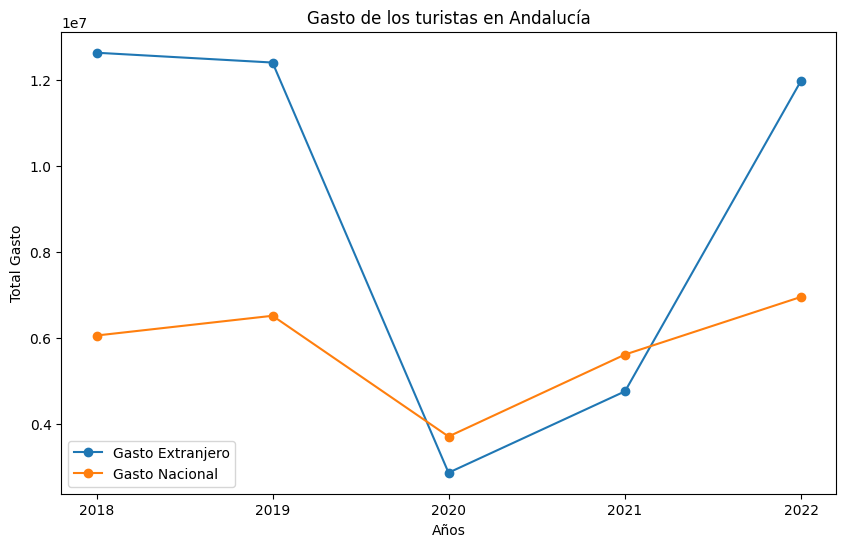

In [38]:
# Creamos un gráfico de líneas que muestra la evolución del gasto total de turistas en Andalucía según si son nacionales o extranjeros
plt.figure(figsize = (10, 6))

plt.plot(df_turismo_gasto["Periodo"], df_turismo_gasto["Total Gasto Extranjero"], marker = "o", label = "Gasto Extranjero")
plt.plot(df_turismo_gasto["Periodo"], df_turismo_gasto["Total Gasto Nacional"], marker = "o", label = "Gasto Nacional")

plt.title("Gasto de los turistas en Andalucía")
plt.xlabel("Años")
plt.ylabel("Total Gasto")
plt.legend()

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graficos/Gasto de los turistas en Andalucía.png")

### Conclusión

En este análisis y viendo el gráfico, podemos ver el gasto de los turistas extranjeros y nacionales en Andalucía.  
Vemos que en 2019 hay un ligero descenso del gasto extranjero, pero un ligero ascenso en el gasto nacional.  
En 2020 y 2021 vemos como el gasto nacional esta por encima del gasto extranjero. Esto es debido a la pandemia COVID-19, que debido al cierre de fronteras, los confinamientos y la lenta vuelta a la normalidad, potenciaría a que la gentes hiciera más viajes y gasto dentro de sus propios territorios que en el exterior.  
En 2022 ya vemos como estamos más cerca de cifras normales. Aún así destaca que el gasto nacional está por encima de los datos pre-pandemia, mientras que el gasto extranjero aun no ha logrado a alcanzar cifras anteriores a 2020.

<a id="9"></a> <br>
### BONUS: El turismo extranjero en España según el país de procedencia

In [39]:
# Creamos nuestro dataframe
df_turismo_extranjero_procedencia = pd.read_csv("./data/Número de turistas extranjeros según país de residencia.csv", encoding = "latin1", sep = ";")

# Eliminamos las columnas que no necesitamos
df_turismo_extranjero_procedencia = df_turismo_extranjero_procedencia.drop(["Tipo de dato"], axis = 1)

# Eliminamos las filas con valores nulos
df_turismo_extranjero_procedencia = df_turismo_extranjero_procedencia.dropna()

# Convertimos la columna 'Periodo' en formato fecha y modificamos la columna 'Total'
df_turismo_extranjero_procedencia["Periodo"] = pd.to_datetime(df_turismo_extranjero_procedencia["Periodo"], format = "%YM%m")
df_turismo_extranjero_procedencia["Total"] = df_turismo_extranjero_procedencia["Total"].str.replace(".", "").replace("", "0").astype(int)

# Sumamos las cifras por año completo
df_turismo_extranjero_procedencia["Año"] = df_turismo_extranjero_procedencia["Periodo"].dt.year
df_turismo_extranjero_procedencia = df_turismo_extranjero_procedencia.groupby(["Año", "País de residencia"])["Total"].sum().reset_index()
df_turismo_extranjero_procedencia["Año"] = pd.to_datetime(df_turismo_extranjero_procedencia["Año"], format = "%Y")

In [40]:
df_turismo_extranjero_procedencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Año                 60 non-null     datetime64[ns]
 1   País de residencia  60 non-null     object        
 2   Total               60 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 1.3+ KB


In [41]:
df_turismo_extranjero_procedencia.head()

,Año,País de residencia,Total
0,2018-01-01,Alemania,11414955
1,2018-01-01,Bélgica,2505146
2,2018-01-01,Estados Unidos de América,2959487
3,2018-01-01,Francia,11293321
4,2018-01-01,Irlanda,2053386


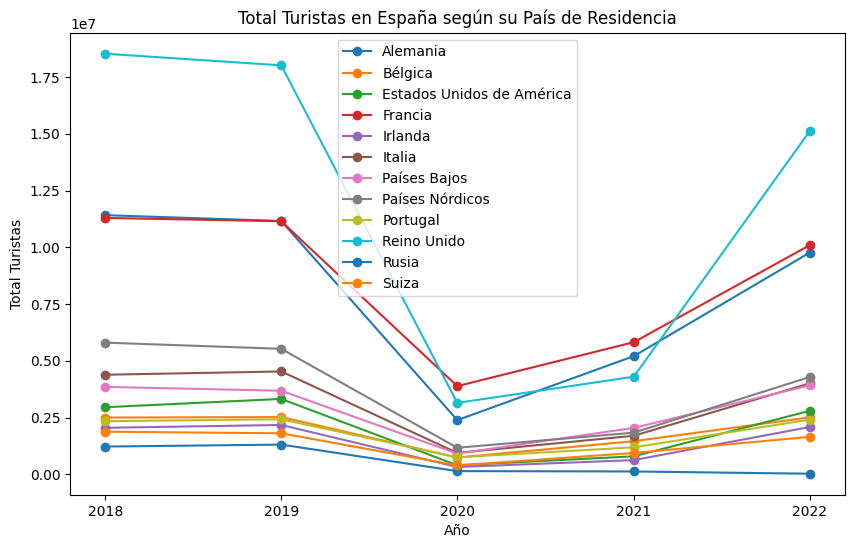

In [42]:
# Creamos un gráfico de líneas que muestra la evolución del número total de turistas a España según su país de residencia
plt.figure(figsize = (10, 6))

for i, pais in enumerate(df_turismo_extranjero_procedencia["País de residencia"].unique()):
    pais_data = df_turismo_extranjero_procedencia[df_turismo_extranjero_procedencia["País de residencia"] == pais]
    plt.plot(pais_data["Año"], pais_data["Total"], marker = "o", label = pais)

plt.title("Total Turistas en España según su País de Residencia")
plt.xlabel("Año")
plt.ylabel("Total Turistas")
plt.legend()

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"));

plt.savefig("./graficos/Total Turistas en España según su País de Residencia.png")

### Conclusión

Es cierto que estos datos son de España, pero al no tener acceso a unos específico de Andalucía, he considerado que pueden valer para hacer una radiografía de la procedencia de los turistas desde el extranjero.

En esta gráfica vemos como los países que lindan con España no son los que más nos visitan. Francia los tenemos en 2º - 3º lugar, pero es que Portugal que está en la misma Peninsula Ibérica, lo encontramos entre los que menos nos visitan.  
Los que más nos visitan son procedentes de Reino Unido y Alemania, pero sobre todo el primero.  
En la gráfica también podemos ver la influencia de la pandemia COVID-19, pero es que en el caso de los turistas británicos vemos como la caida es bastante más acusada, pues llega a caer incluso por debajo de Alemania y Francia. Esto además de ser debido a la presencia de virus y sus restricciones, que sería mayores incluso ya que el acceso es a través de vía aérea frente a los otros dos paises, también puede estar debido al Brexit, el cúal se produjo a principios de 2020.